In [7]:
using Plots

In [8]:
f(x, y) =  y*x^2 + (1/(x^2 + y^2 + 1))
f_x(x, y) = 2x*y - 2x/(x^2 + y^2 + 1)^2
f_y(x, y) = x^2 - 2y/(x^2 + y^2 + 1)^2

f_y (generic function with 1 method)

In [9]:
using LaTeXStrings

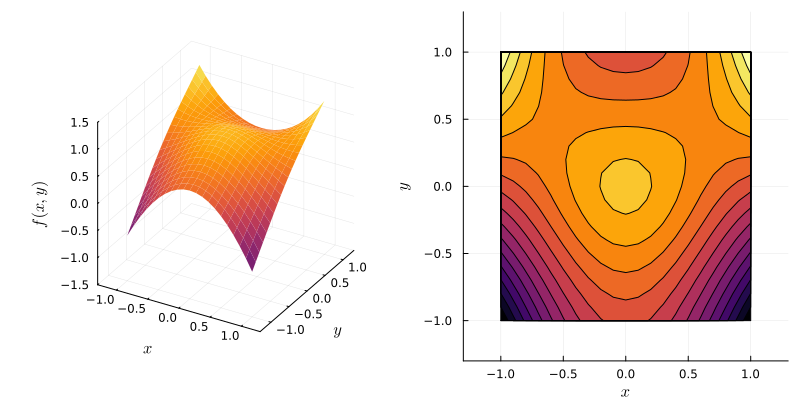

In [10]:
# surface と　contour を並べて表示
x = -1:0.1:1
y = -1:0.1:1


plot(
    surface(x, y, f, cbar=false, alpha=0.98),
    contour(x, y, f, fill=true, cbar=false),
    layout=(1,2), size=(800, 400), legend=false,
    xlims=(-1.3,1.3), ylims=(-1.3,1.3), zlims=(-1.5,1.5),
    camera=(30, 30), xlabel=L"x", ylabel=L"y", zlabel=L"f(x,y)",
)



# savefig("../img/f0.png")


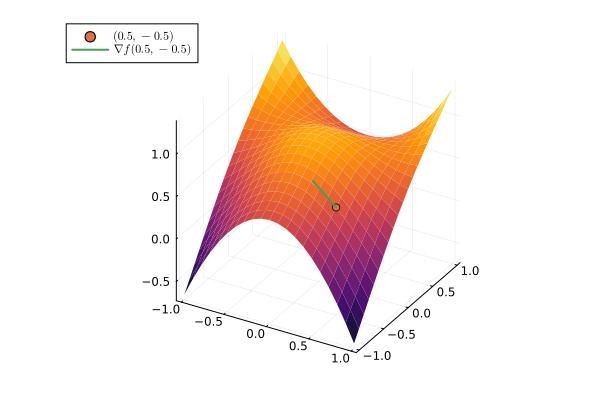

In [11]:
p1 = surface(x, y, f, cbar=false, alpha=0.98)

_x = 0.5
_y = -0.5
_z = f(_x, _y)

k = 0.5
g_x = f_x(_x, _y)
g_y = f_y(_x, _y)

scatter!(p1, [_x], [_y], [_z], label=L"(0.5, -0.5)")

arrow_x = [_x, _x + (k * g_x)]
arrow_y = [_y, _y + (k * g_y)]
arrow_z = [_z, _z]

plot!(p1, arrow_x, arrow_y, arrow_z, arrow=(:closed, 10.0), label=L"\nabla f(0.5, -0.5)", linewidth = 2)

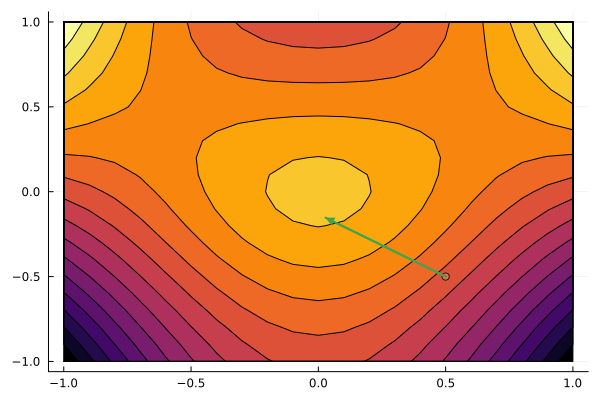

In [12]:
p2 = contour(x, y, f, fill=true, cbar=false)

_x = 0.5
_y = -0.5
k = 0.5

g_x = f_x(_x, _y)
g_y = f_y(_x, _y)

scatter!(p2, [_x], [_y], label=nothing)

arrow_x = [_x, _x + (k * g_x)]
arrow_y = [_y, _y + (k * g_y)]

plot!(p2, arrow_x, arrow_y, arrow=(:closed, 2.0), label=nothing, linewidth = 2)

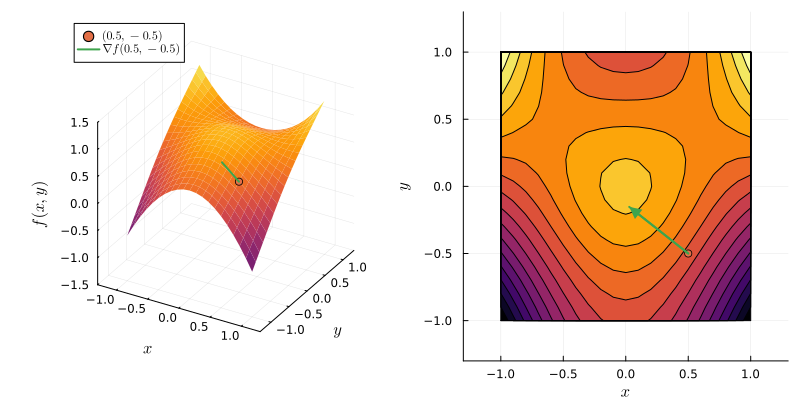

In [13]:
plot(
    p1,
    p2,
    layout=(1,2), size=(800, 400),
    xlims=(-1.3,1.3), ylims=(-1.3,1.3), zlims=(-1.5,1.5),
    camera=(30, 30), xlabel=L"x", ylabel=L"y", zlabel=L"f(x,y)",
)

In [14]:
# 勾配降下法の gif
anim = Animation()

_x = 0.1
_y = -0.1
n_iter = 38
lr = 0.03

x_history = [_x]
y_history = [_y]
z_history = [f(_x, _y)]

for i in 1:n_iter
    _z = f(_x, _y)

    g_x = f_x(_x, _y)
    g_y = f_y(_x, _y)

    k = 0.5
    
    p1 = surface(x, y, f, cbar=false, alpha=0.98, title="iter: $i")
    
    scatter!(p1, [_x], [_y], [_z], label=nothing, markersize=5)

    

    arrow_x = [_x, _x - (k * g_x)]
    arrow_y = [_y, _y - (k * g_y)]
    arrow_z = [_z, _z]

    plot!(p1, arrow_x, arrow_y, arrow_z, arrow=(:closed, 10.0), label=L"-\nabla f(x, y)", linewidth = 2)

    plot!(p1, x_history, y_history, z_history, linewidth=2, label=nothing)

    frame(anim, p1)


    _x = _x - (lr * g_x)
    _y = _y - (lr * g_y)
    _z = f(_x, _y)

    push!(x_history, _x)
    push!(y_history, _y)
    push!(z_history, _z)
end


┌ Info: Saved animation to /Users/yuchi/Desktop/honwaka-theme/img/gd3d.gif
└ @ Plots /Users/yuchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/yuchi/Desktop/honwaka-theme/img/gd3d.gif")
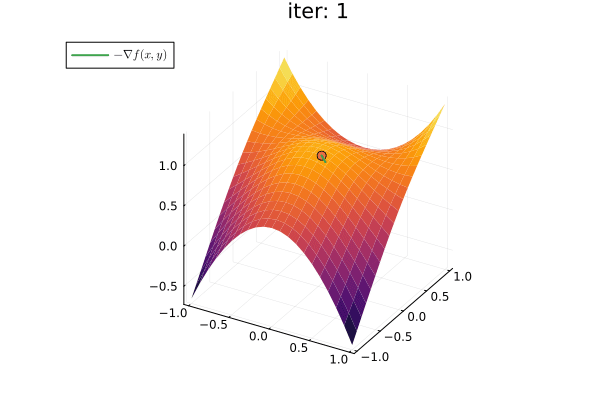

In [15]:
gif(anim, "../img/gd3d.gif", fps = 10)

In [16]:
function numerical_derivative(f, x; h=1e-8)
    g = (f(x+h) - f(x)) / h
    return g
end

numerical_derivative (generic function with 1 method)

In [17]:
f(x) = sin(x)
f′(x) = cos(x)

f′ (generic function with 1 method)

In [18]:
x = π / 3
numerical_derivative(f, x)

0.4999999969612645

In [19]:
f′(x)

0.5000000000000001

In [51]:
H = [0.1^i for i in 4:0.5:10]
E = Float64[]

for h in H
    d = numerical_derivative(f, x, h=h)
    e = abs(d - f′(x))
    push!(E, e)
end

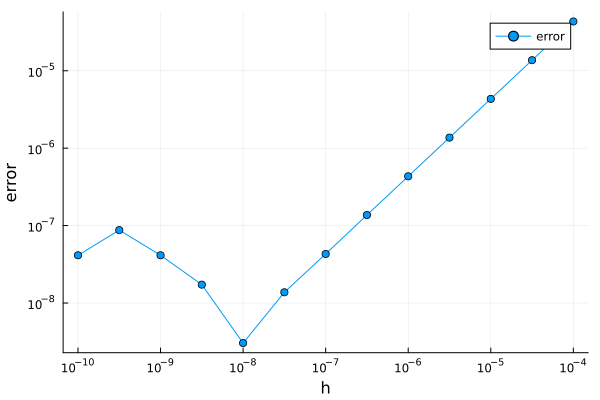

In [52]:
plot(H, E, xaxis=:log, yaxis=:log, xlabel="h", ylabel="error", label="error", grid=true, marker=:circle)
xaxis!(
    [0.1^i for i in 2:10],
)

yaxis!(
    [0.1^i for i in 2:10],
)

In [53]:
function numerical_gradient(f, x::Vector; h=1e-8)
    n = length(x)
    g = zeros(n)
    y = f(x...)
    for i in 1:n
        x[i] += h
        g[i] = (f(x...) - y) / h
        x[i] -= h
    end
    return g
end


numerical_gradient (generic function with 1 method)

In [54]:
numerical_gradient(f, [0.5, -0.5])

2-element Vector{Float64}:
 -0.9444444559747467
  0.6944444463918842